# Credit Card Fraud Detection

## Objective
Identify **fraudulent credit card transactions** using machine learning.

## Dataset Overview
The dataset contains anonymized credit card transactions labeled as fraud or not.

- `Time`, `Amount`, and anonymized features `V1` to `V28`
- `Class`: 1 for fraud, 0 for non-fraud

## Workflow
1. Load and explore the dataset
2. Handle class imbalance
3. Feature scaling and model training
4. Evaluate performance

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [4]:
# Load the dataset
df = pd.read_csv("creditcard.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

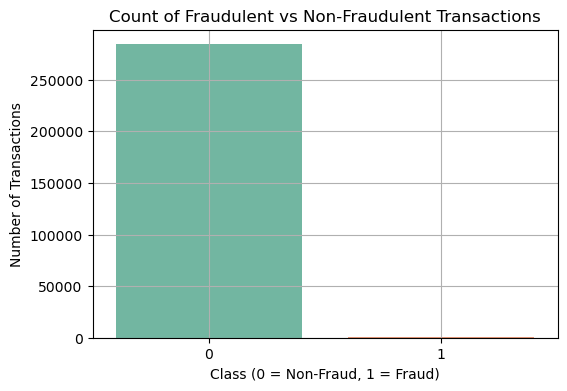

Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


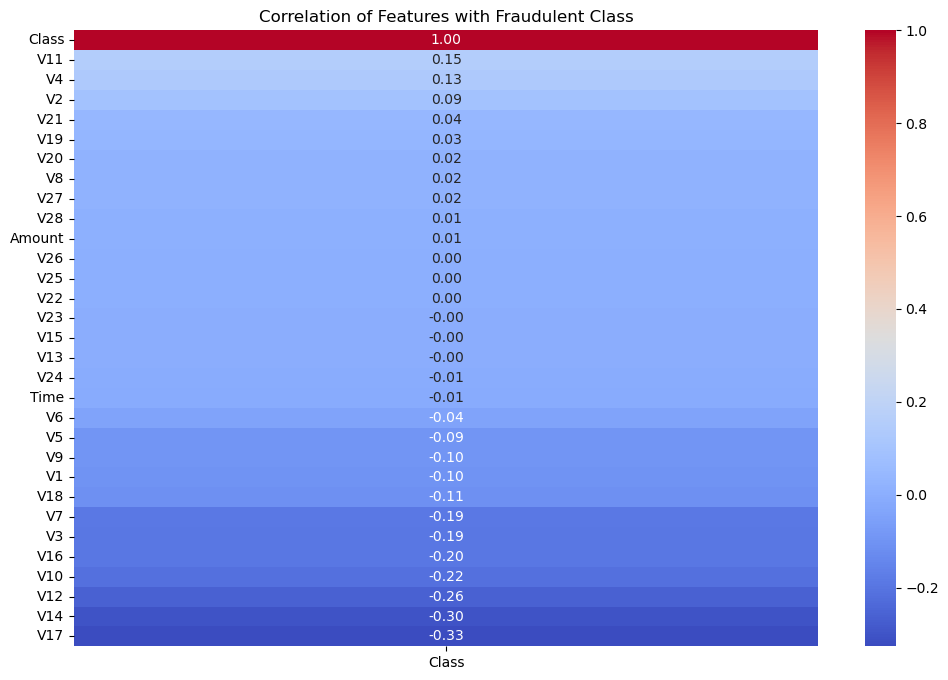

In [11]:
# Count of fraud vs non-fraud
plt.figure(figsize=(6,4))
sns.countplot(x='Class', hue='Class', data=df, palette='Set2', legend=False)
plt.title('Count of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

# Print counts too
print("Class distribution:\n", df['Class'].value_counts())

# Correlation heatmap
corr_matrix = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(
    corr_matrix[['Class']].sort_values(by='Class', ascending=False),
    annot=True, cmap='coolwarm', fmt=".2f"
)
plt.title('Correlation of Features with Fraudulent Class')
plt.show()



## Data Preprocessing

In [13]:
# Feature scaling for 'Amount' and 'Time'
# Make a copy to avoid touching original dataframe
df_scaled = df.copy()

# Apply standard scaling
scaler = StandardScaler()
df_scaled[['scaled_amount', 'scaled_time']] = scaler.fit_transform(df_scaled[['Amount', 'Time']])


# Drop original columns
df_scaled.drop(['Amount', 'Time'], axis=1, inplace=True)


# Rearranging columns# Optional: Rearranging for better readability
columns = [col for col in df_scaled.columns if col != 'Class'] + ['Class']
df_scaled = df_scaled[columns]

# Optional: Rearranging for better readability
columns = [col for col in df_scaled.columns if col != 'Class'] + ['Class']
df_scaled = df_scaled[columns]



## Model Training

In [15]:
# Define features and target
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)


# Predictions
y_pred = model.predict(X_test)



## Evaluation

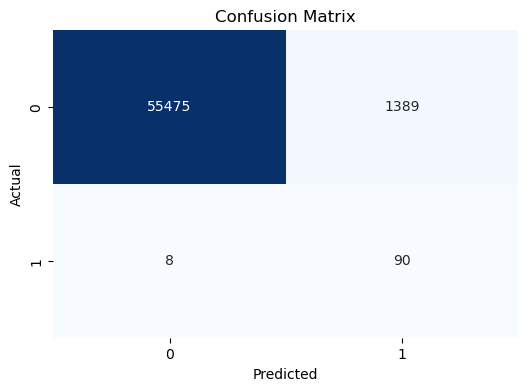

Classification Report:

              precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0609    0.9184    0.1141        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5509     56962
weighted avg     0.9982    0.9755    0.9861     56962

Accuracy: 0.9755


In [17]:
# Confusion matrix and classification report


# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# Accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")



##  Conclusion

- We used a Logistic Regression model with class weighting to handle severe class imbalance in credit card fraud detection.
- The model achieved an overall **accuracy of 97.55%**, but accuracy alone isn’t enough due to class imbalance.
- For fraudulent transactions (Class = 1):
  - Precision: **0.0609** (many false positives)
  - Recall: **0.9184** (caught most fraud cases)
  - F1-score: **0.1141**
- The model **successfully detected most fraudulent cases**, but struggled with precision — meaning it flagged many non-frauds as frauds.
-  To improve performance further:
  - Try **SMOTE** or **under/over-sampling techniques**
  - Experiment with **tree-based models** like Random Forest or XGBoost
  - Use **feature selection** to reduce noise and improve precision

 Still, this model is a strong baseline for fraud detection, especially in high-risk environments where catching fraud matters more than a few false alerts.

